In [1]:
!pip3 install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.impute import SimpleImputer
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.metrics.cluster import rand_score
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [3]:
from ucimlrepo import fetch_ucirepo 

chronic_kidney_disease = fetch_ucirepo(id=336) 

df = pd.concat([chronic_kidney_disease.data.features, chronic_kidney_disease.data.targets], axis=1)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


1. Classification Problem Identification: Define and describe a classification problem based on the dataset.

Using different health features we want to classify indivuals into one of two groups, has Chronic Kidney Disease or does not have Chronic Kidney Disease.

2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

In [4]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [5]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [6]:
float64_columns = df.select_dtypes(
    include=['float64']
    ).columns
float64_columns
scaler = StandardScaler()
df[float64_columns] = scaler.fit_transform(df[float64_columns])

In [7]:
cat_columns = df.select_dtypes(
    include=['object']
    ).columns

for col in cat_columns:
    print(df[col].value_counts(normalize=True))

rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64
htn
no     0.630653
yes    0.369347
Name: proportion, dtype: float64
dm
no      0.653266
yes     0.344221
\tno    0.002513
Name: proportion, dtype: float64
cad
no     0.914573
yes    0.085427
Name: proportion, dtype: float64
appet
good    0.794486
poor    0.205514
Name: proportion, dtype: float64
pe
no     0.809524
yes    0.190476
Name: proportion, dtype: float64
ane
no     0.849624
yes    0.150376
Name: proportion, dtype: float64
class
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64


In [8]:
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1,1,0,0,-0.341498,...,0.569881,-0.206202,0.481295,1,2,0,0,0,0,0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1,1,0,0,NaN,...,-0.098536,-0.818559,NaN,0,1,0,0,0,0,0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1,1,0,0,3.473064,...,-0.878356,-0.308261,NaN,0,2,0,1,0,1,0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1,0,1,0,-0.392022,...,-0.766953,-0.580420,-0.788961,1,1,0,1,1,1,0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.432744,-0.376301,-0.104977,0,1,0,0,0,0,0


3. Dataset Overview: Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    int8   
 6   pc      400 non-null    int8   
 7   pcc     400 non-null    int8   
 8   ba      400 non-null    int8   
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     400 non-null    int8   
 19  dm      400 non-null    int8   
 20  cad     400 non-null    int8   
 21  appet   400 non-null    int8   
 22  pe

In [10]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,400.00000,400.000000,400.000000,400.000000,3.560000e+02,...,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,...,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,1.330000,0.080000,0.202500,0.187500,0.147500,0.755000
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.93256,0.759089,0.325946,0.251262,1.001407e+00,...,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.506697,0.289499,0.408547,0.397163,0.362038,0.968152
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,...,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,...,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,...,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.00000,1.000000,0.000000,0.000000,1.890038e-01,...,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.00000,1.000000,1.000000,1.000000,4.319341e+00,...,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [11]:
df["class"].value_counts()

class
0    248
2    150
1      2
Name: count, dtype: int64

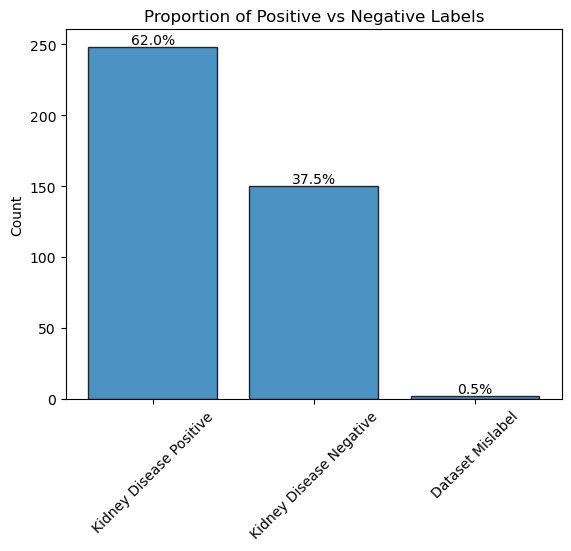

In [12]:
fig, ax = plt.subplots(1, 1)
bar_data = df["class"].value_counts()
ax.bar(range(len(bar_data)), bar_data, edgecolor="black", alpha=0.8)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Kidney Disease Positive", "Kidney Disease Negative", "Dataset Mislabel"], rotation=45)

for i, count in enumerate(bar_data):
    percentage = count / bar_data.sum() * 100
    ax.text(i, count, f"{percentage:.1f}%", ha="center", va="bottom")
ax.set_ylabel("Count")
ax.set_title("Proportion of Positive vs Negative Labels")
plt.show()

#### Visualizing distribution of continuous variables with Kernel Density Estimation

c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

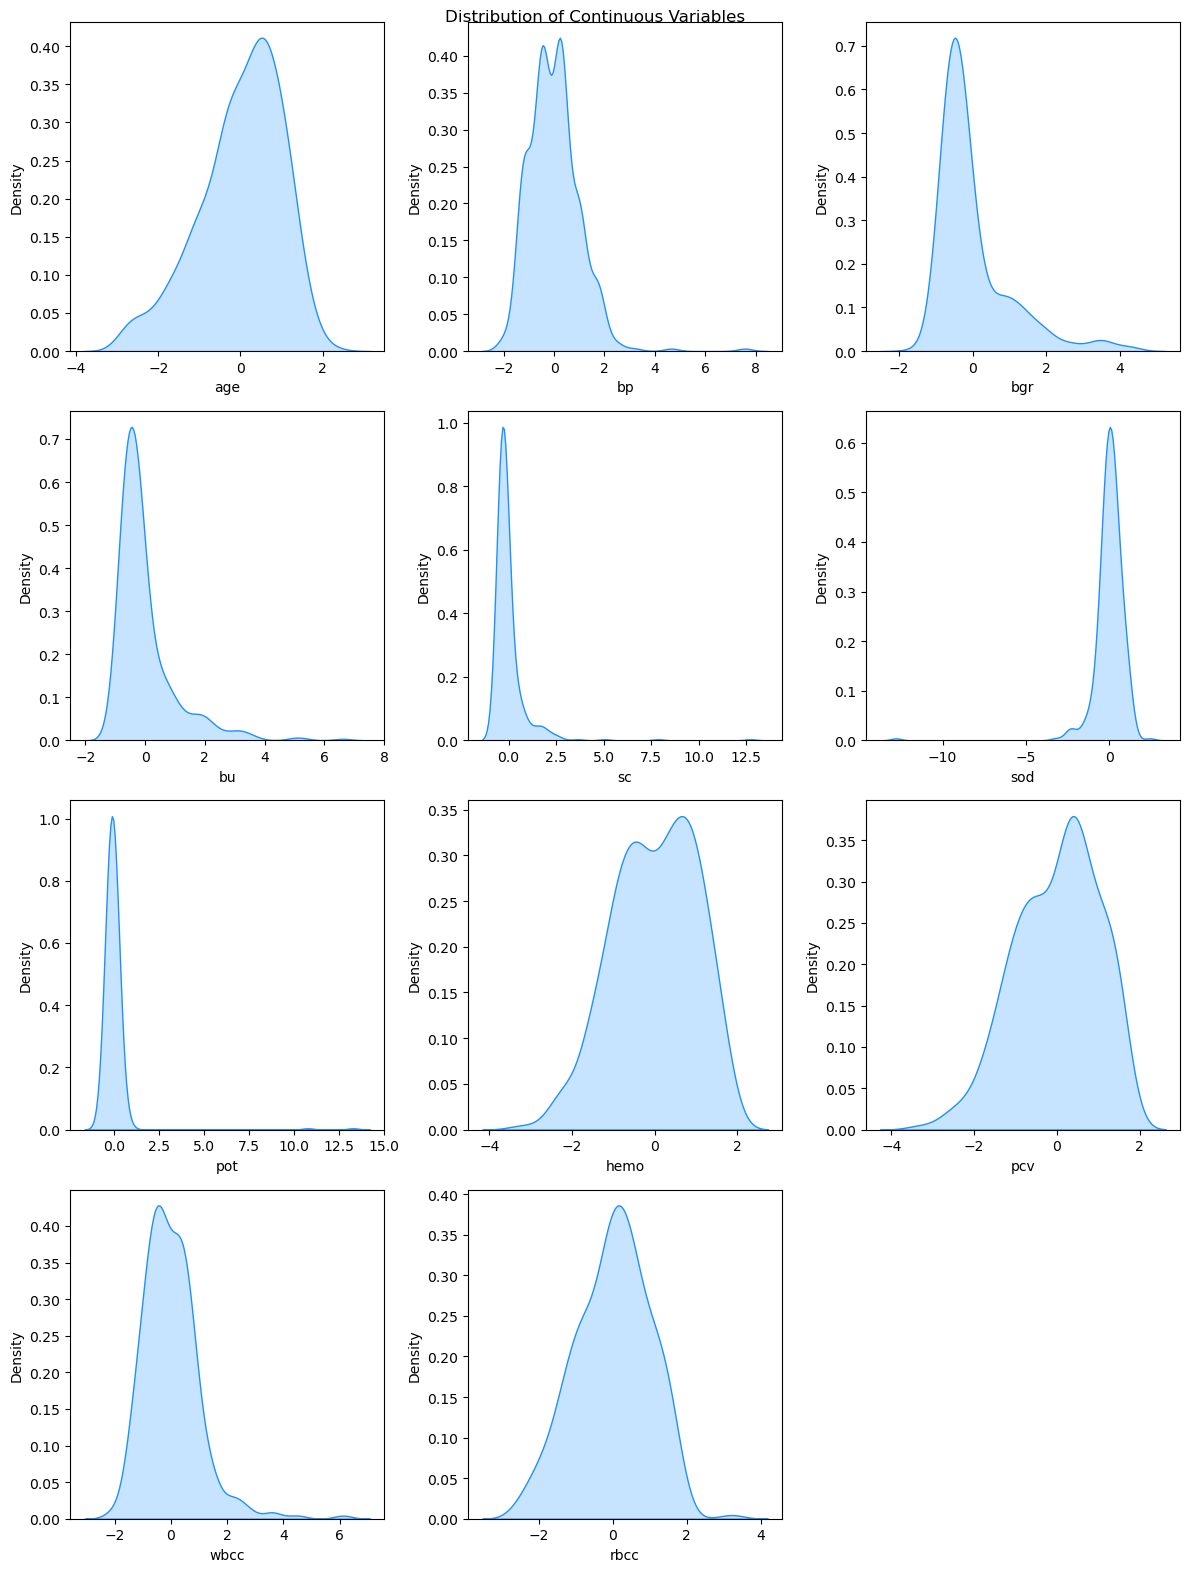

In [13]:
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

num_features = len(num_vars)
num_rows = 4  # Number of rows in the subplot grid
num_cols = 3  # Number of columns in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

for i, cont_feature in enumerate(df[num_vars]):
    row = i // num_cols  # Calculate the row index for the subplot
    col = i % num_cols  # Calculate the column index for the subplot

    ax_kde = axes[row, col]

    # Plot KDE for the feature
    sns.kdeplot(df[cont_feature], ax=ax_kde, fill=True, color="dodgerblue")

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle("Distribution of Continuous Variables")
plt.tight_layout()
plt.show()

c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

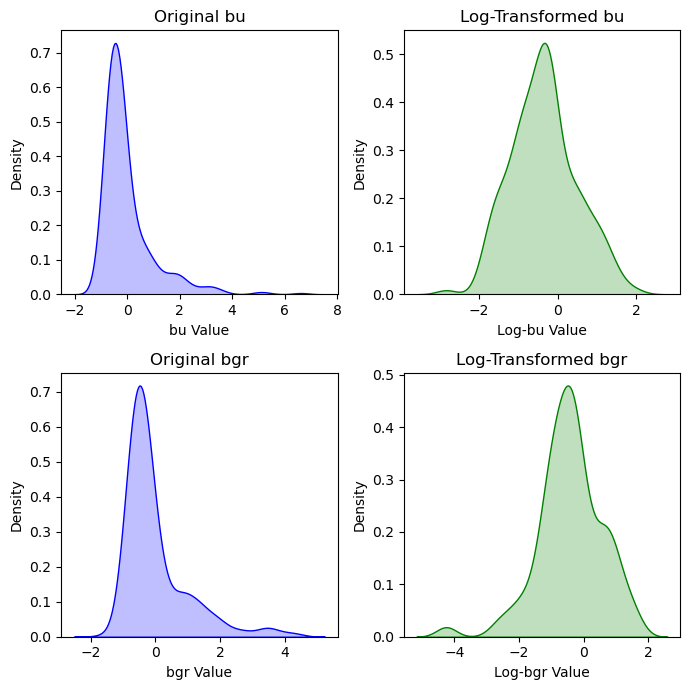

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a new DataFrame with selected variables and their transformations
data_log_vis = pd.DataFrame({
    'bu': df['bu'],
    'log_bu': np.log(df['bu'] + 1),  # Log transform with handling zero values
    'bgr': df['bgr'],
    'log_bgr': np.log(df['bgr'] + 1)
})

# Variables to plot
variables = ['bu', 'bgr']

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.flatten()  # Flatten to simplify indexing

for i, var in enumerate(variables):
    # Original Data Plot
    sns.kdeplot(data_log_vis[var], ax=axes[2*i], fill=True, color="blue")
    axes[2*i].set_title(f"Original {var}")
    axes[2*i].set_xlabel(f"{var} Value")
    axes[2*i].set_ylabel("Density")

    # Log-Transformed Data Plot
    sns.kdeplot(data_log_vis[f'log_{var}'], ax=axes[2*i+1], fill=True, color="green")
    axes[2*i+1].set_title(f"Log-Transformed {var}")
    axes[2*i+1].set_xlabel(f"Log-{var} Value")
    axes[2*i+1].set_ylabel("Density")

plt.tight_layout()
plt.show()


Observations:
1. The dataset has an imbalance in the number of kidney disease positive vs negative examples. Our visual exploratory data analysis also revealed that there are two mislabeled variables in the dataset's target column. The column in the dataset should include only "positive" or "negative" Kidney disease status, but there were a few examples with a third label. We discuss this more in the outliers section.
2. Many of the variables look roughly noramlly distributed, except that the blood glucode random and blood urea features are long-tailed. This has implications for feature engineering: we expect that log-transforming these features will make them closer to a normal distribution; this is likely to improve performance on classifiers such as logistic regression. We visualized these variables log-transformed to confirm that they look closer to a normal distribution after the transformation
3. Most variables are continuous, although the specific gravity, albumin and sugar levels are categorical.

4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,-0.181683,-0.209743,0.169865,0.065425,0.244992,...,-0.242119,0.118339,-0.268896,0.389724,0.354065,0.221807,0.148648,0.085726,0.041271,-0.222361
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,-0.194643,-0.129873,0.074018,0.126518,0.160193,...,-0.326319,0.029753,-0.261936,0.277324,0.235513,0.098398,0.184732,0.062676,0.204279,-0.297019
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,0.421101,0.299093,-0.290210,-0.220317,-0.374710,...,0.603560,-0.236215,0.579476,-0.410243,-0.436692,-0.195717,-0.268856,-0.298504,-0.243082,0.729117
al,0.122091,0.160689,-0.469760,1.000000,0.269305,-0.110803,-0.375461,0.403257,0.366845,0.379464,...,-0.611891,0.231989,-0.566437,0.525234,0.406456,0.272713,0.359009,0.477127,0.322958,-0.625585
su,0.220866,0.222576,-0.296234,0.269305,1.000000,-0.187230,-0.221037,0.156997,0.115534,0.717827,...,-0.239189,0.184893,-0.237448,0.321166,0.500133,0.276542,0.089770,0.144712,0.077908,-0.345589
rbc,-0.181683,-0.194643,0.421101,-0.110803,-0.187230,1.000000,0.393821,0.002845,0.019199,-0.193079,...,0.350038,0.029804,0.339400,-0.321229,-0.345661,-0.129224,-0.190258,-0.143371,-0.135308,0.630148
pc,-0.209743,-0.129873,0.299093,-0.375461,-0.221037,0.393821,1.000000,-0.136040,-0.088435,-0.175899,...,0.391230,-0.079035,0.390282,-0.344689,-0.345482,-0.154193,-0.172015,-0.244199,-0.233601,0.397401
pcc,0.169865,0.074018,-0.290210,0.403257,0.156997,0.002845,-0.136040,1.000000,0.376102,0.215386,...,-0.326328,0.184171,-0.371968,0.206843,0.173907,0.184861,0.193949,0.113742,0.178299,-0.283455
ba,0.065425,0.126518,-0.220317,0.366845,0.115534,0.019199,-0.088435,0.376102,1.000000,0.109492,...,-0.230173,0.115111,-0.266713,0.111083,0.099610,0.157115,0.155157,0.141271,0.064608,-0.222438
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,-0.193079,-0.175899,0.215386,0.109492,1.000000,...,-0.301385,0.150015,-0.281541,0.391924,0.511183,0.233901,0.186831,0.111331,0.142375,-0.419245


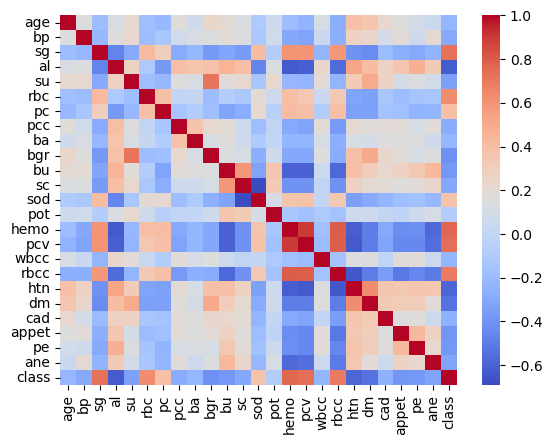

In [15]:
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm')

correlation

Hemp and wbcc, hemo and rbcc, pcv and rbcc have the three highest positive correlations. 

Sc and sod, hemo and htn, pcv and htn, hemo and ane, pcv and ane have the highest negative correlations.

Highly correlated features can lead to overfitting or redundant information. We can get rid of redundant features which leads to simpler models.

5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [16]:
# Missing Value Analysis
missing_values = df.isnull().sum()

print(missing_values)

age        9
bp        12
sg        47
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64


In [17]:
# Mean imputer for numerical values and most frequent imputer for categorical values
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
cat_vars = ['sg', 'al', 'su']

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_vars] = imputer_num.fit_transform(df[num_vars])
df[cat_vars] = imputer_cat.fit_transform(df[cat_vars])

For numerical features (age, bp, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc), we'll use mean imputation.
For categorical features (sg, al, su), we'll use mode imputation.
Binary features (rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane) already have no missing values.

6. Outlier Analysis: Implement your approach for identifying and managing outliers, or pro- vide reasons for not addressing them.

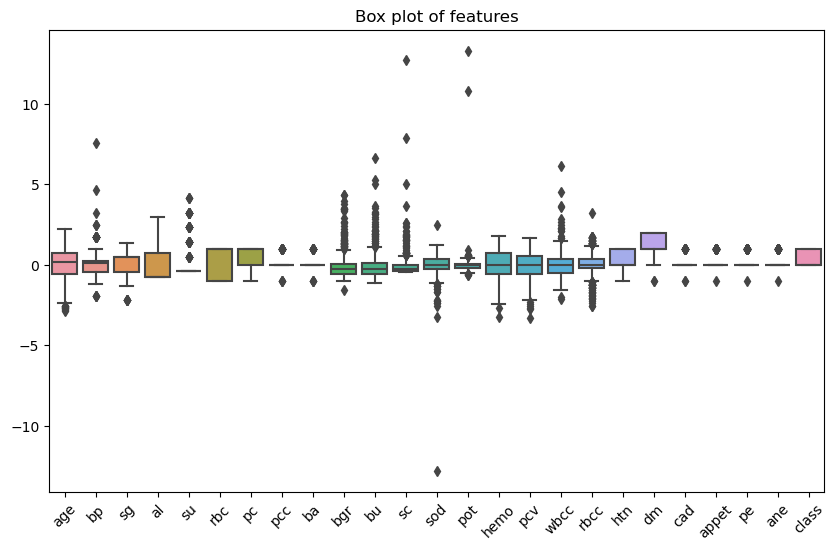

In [18]:
# I noticed dm has 1s and 2s, so I converted them to 0s and 1s
# Class has 0s and 2s, so I converted them to 0s and 1s
df['dm'] = df['dm'].replace({'2':1, '1':0})
df['class'] = df['class'].replace({2:1})

# Outlier Handling

# Visualize the data using box plots or scatter plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plot of features')
plt.xticks(rotation=45)
plt.show()

# Outlier Removal
# Once outliers are identified, we can choose to remove them from the dataset. However, it's crucial
# to ensure that removal doesn't significantly affect the representativeness of the data.

# Removing outliers based on Z-score

z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

Removing outliers based on the Z-score involves standardizing the data to measure the number of standard deviations each data point is from the mean. This approach is advantageous because it provides a standardized measure that is interpretable and robust to the scale of the data. Outliers are typically identified using a threshold, such as |Z-score| > 3, which corresponds to data points that are more than 3 standard deviations away from the mean. However, this method assumes that the data follows a normal distribution and may lead to loss of information and reduction in sample size. Therefore, it's crucial to consider the appropriateness of Z-score-based outlier removal.

7. Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [19]:
# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

k = 4  # Select a random number of clusters
kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
kmeans.fit(df)
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Average Silhouette Score:", silhouette_avg)

Average Silhouette Score: 0.25364463071596377


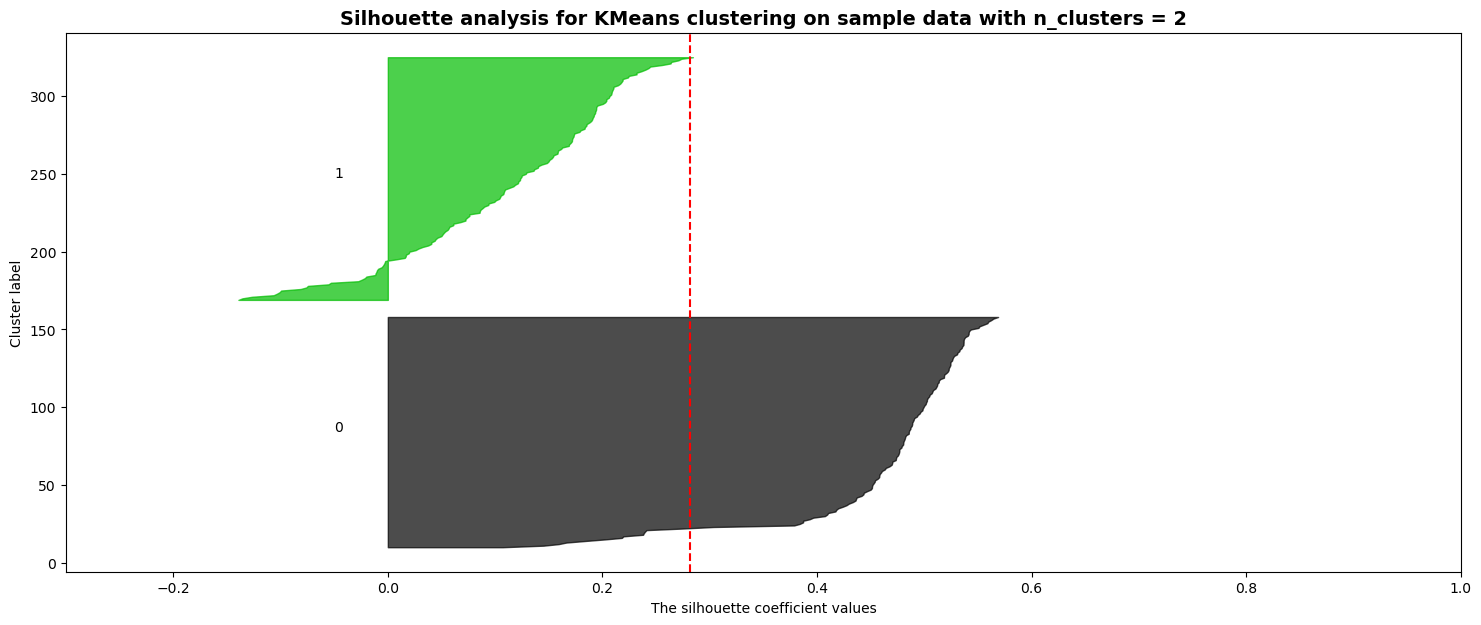

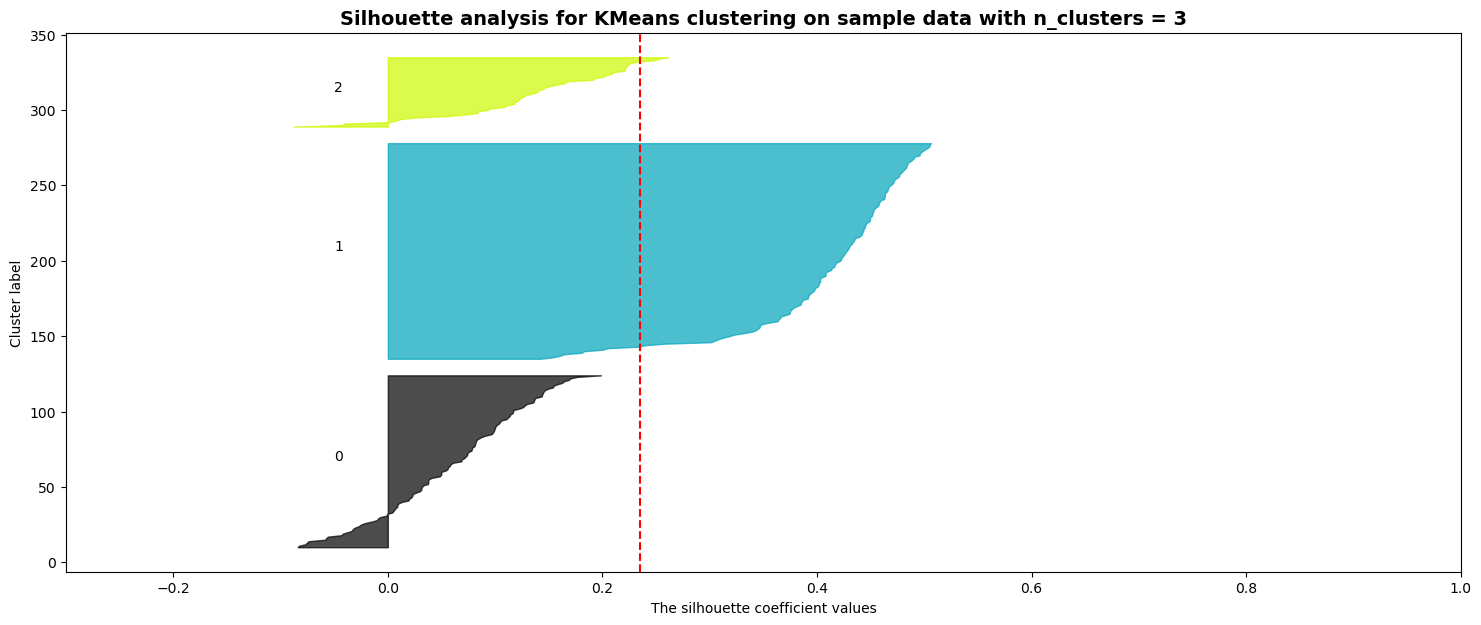

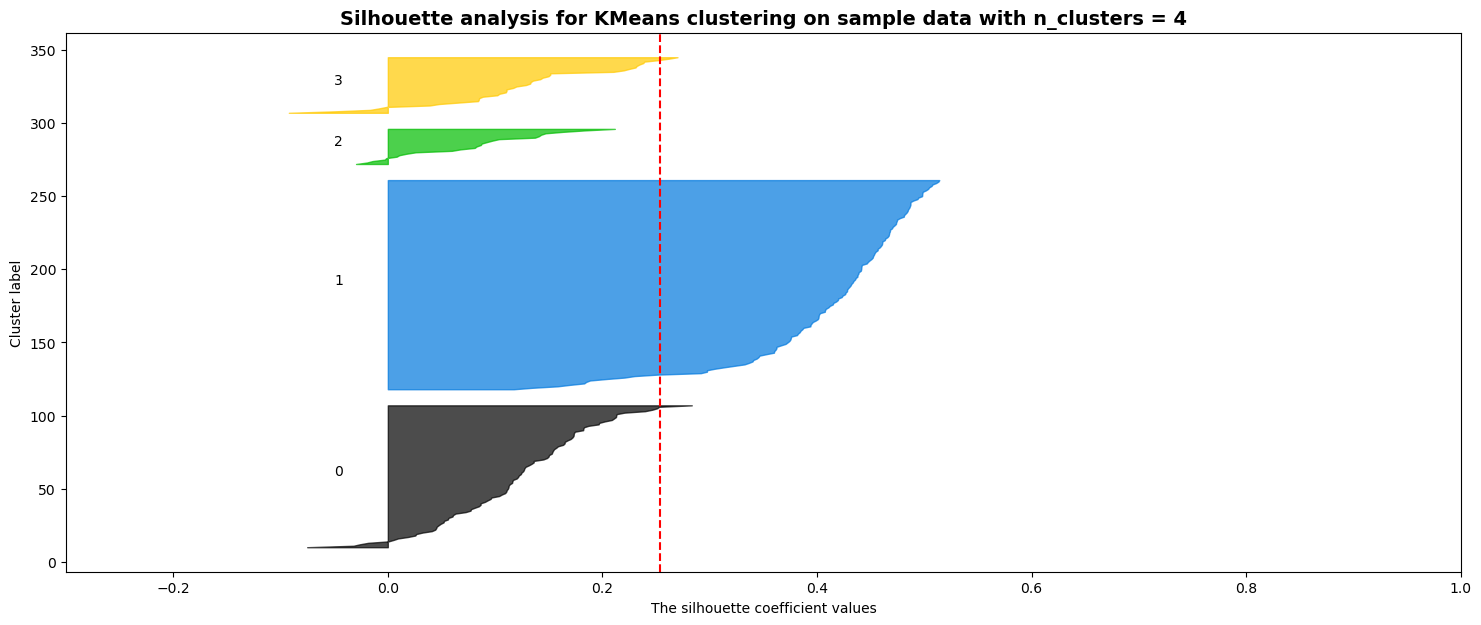

Optimal number of clusters: 2


In [20]:
# Determine optimal number of clusters using silhouette scores
range_n_clusters = [2, 3, 4]
optimal_k = (0,0)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df)
    # average silhouette score
    silhouette_avg_km = silhouette_score(df, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    optimal_k = (n_clusters,silhouette_avg_km) if optimal_k[1] < silhouette_avg_km else optimal_k

plt.show()
print("Optimal number of clusters:", optimal_k[0])

Number of observations within each cluster:
0    149
1    157
Name: count, dtype: int64
Variances:  [1.86062807 1.03162958 0.89413034 0.82674724 0.77679646]


Text(0, 0.5, 'Variances')

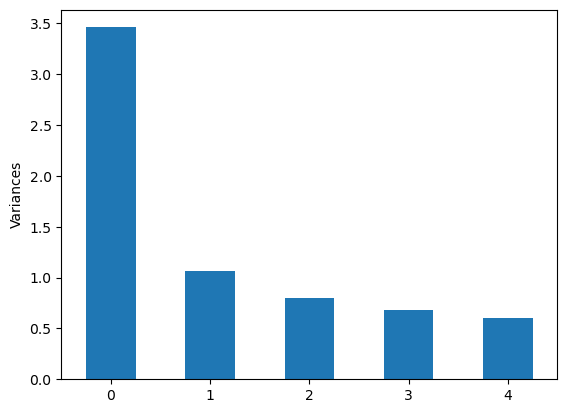

In [21]:
# Apply k-means clustering with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k[0], n_init=20, random_state=0)
kmeans_optimal.fit(df)
cluster_counts = pd.Series(kmeans_optimal.labels_).value_counts().sort_index()
print("Number of observations within each cluster:")
print(cluster_counts)

# Perform PCA
pca = PCA()
df2_plot = pd.DataFrame(pca.fit_transform(df))
print("Variances: ",df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy())

df2_plot.iloc[:,:5].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

In [22]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
              pca.explained_variance_ratio_[:5],
              np.cumsum(pca.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,1.860628,1.031630,0.894130,0.826747,0.776796
Proportion of Variance,0.356795,0.109685,0.082395,0.070444,0.062189
Cumulative Proportion,0.356795,0.466480,0.548875,0.619319,0.681508


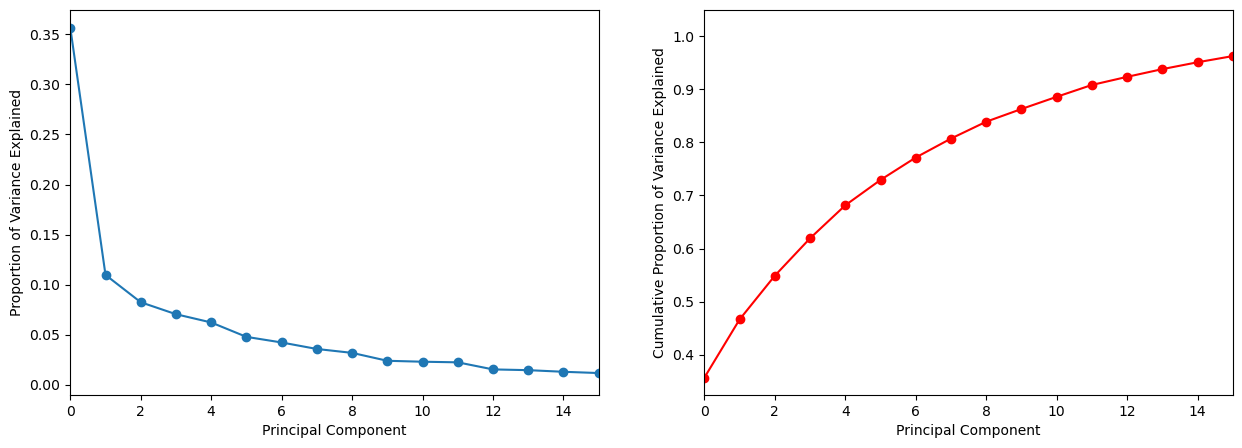

In [23]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(0,15)

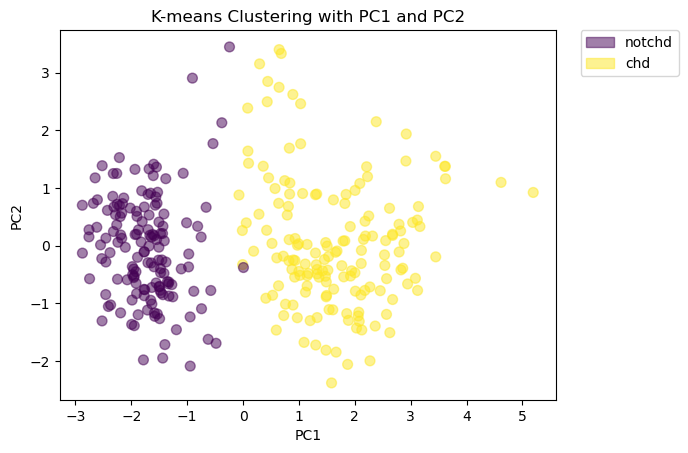

In [24]:
# Visualization of k-means cluster assignments using first two principal components
cmap = plt.cm.viridis

plt.scatter(df2_plot.iloc[:, 0], df2_plot.iloc[:, 1], c=kmeans_optimal.labels_, cmap=cmap, alpha=0.5, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering with PC1 and PC2')
handles = []
labels = pd.factorize(y.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label='chd' if v else 'notchd', alpha=0.5))

plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [25]:
# Compare true labels with k-means cluster assignments
adjusted_rand_index = round(adjusted_rand_score(y, kmeans_optimal.labels_), 2)
rand = rand_score(kmeans_optimal.labels_, y).round(2)
print("Rand Index:", rand)
print("Adjusted Rand Index:", adjusted_rand_index)

Rand Index: 0.95
Adjusted Rand Index: 0.9


8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [26]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

9. Classifier Choices: Identify the two classifiers you have chosen and justify your selections.

In [27]:
# Classifier Choices
rf = RandomForestClassifier()
lr = LogisticRegression()

# Model Training
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Model Evaluation
rf_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)
lr_pred = lr.predict(X_test)
lr_y_prob = lr.predict_proba(X_test)
probT_rf = pd.DataFrame(
    data = {'prob0': rf_y_prob[:,1], 'y_test': y_test}
    )
probT_lr = pd.DataFrame(
    data = {'prob0': lr_y_prob[:,1], 'y_test': y_test}
    )
probT_rf['y_test_pred'] = probT_rf.prob0.map(lambda x: 1 if x>0.5 else 0)
probT_lr['y_test_pred'] = probT_lr.prob0.map(lambda x: 1 if x>0.5 else 0)

We chose random forest because it is known for not overfitting and being able to handle multi dimensional data. It also works well when there is both numerical and catagorical data which we have in this case.

We chose logistic regression because it is simple and easy to interpret.

10. Performance Metrics: Outline the two metrics for comparing the performance of the classifiers.

In [28]:
# Accuracy, Sensitivity, Specificity
def evaluate(y_test, y_test_pred):
    cm = confusion_matrix(y_test,y_test_pred)
    print('Confusion Matrix : \n', cm)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    print ('Accuracy : ', accuracy)
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)
    print(classification_report(y_test, y_test_pred, zero_division=0.0))



11. Feature Selection/Extraction: Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

12. Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

In [29]:
print('Random Forest Classifier:\n')
evaluate(probT_rf.y_test, probT_rf.y_test_pred)

print('Logistic Regression Classifier:\n')
evaluate(probT_lr.y_test, probT_lr.y_test_pred)

Random Forest Classifier:

Confusion Matrix : 
 [[51  0]
 [ 1 40]]
Accuracy :  0.9891304347826086
Sensitivity :  1.0
Specificity :  0.975609756097561
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        41

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Logistic Regression Classifier:

Confusion Matrix : 
 [[50  1]
 [ 1 40]]
Accuracy :  0.9782608695652174
Sensitivity :  0.9803921568627451
Specificity :  0.975609756097561
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        41

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



13. Interpretable Classifier Insight: After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

14. Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

# Contributions

Jenna: Created/set up repository and jupyter notebook, started working on questions 1-4, started working on 11, made general edits  

Viransh: References added, started working on questions 5-10

Noah: Finished question 3, added visualizations and discussion of normality/log-transformation

# Github Link

[Github link] (https://github.com/JennaOrvitz/Stats3DA3FinalProject/tree/main)

## References

::: {#refs}
:::